In [1]:
#Load libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''Dataset is taken from https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho '''
os.chdir('/content/drive/My Drive/Ghamut')
data = pd.read_csv("car_data.csv")

In [4]:
#storing data in a sqlite database
import csv, sqlite3

con = sqlite3.connect("car_price.db") 
cur = con.cursor()
cur.execute("CREATE TABLE car_price (Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner);") # use your column names here

with open('car_data.csv','r') as car_price_table: 
    dr = csv.DictReader(car_price_table)
    to_db = [(i['Car_Name'], i['Year'], i['Selling_Price'], i['Present_Price'], i['Kms_Driven'], i['Fuel_Type'], i['Seller_Type'], i['Transmission'], i['Owner']) for i in dr]

cur.executemany("INSERT INTO car_price (Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()
con.close()

OperationalError: ignored

In [5]:
#running a sample query from sqlite database
con = sqlite3.connect("car_price.db")

cur = con.cursor()

for row in cur.execute('SELECT DISTINCT Fuel_Type FROM car_price;'):
    print(row)

con.close()

('Petrol',)
('Diesel',)
('CNG',)


In [6]:
#displaying the first row of database
con = sqlite3.connect("car_price.db")

cur = con.cursor()

cur.execute('SELECT * FROM car_price;')
print(cur.fetchone())

con.close()

('ritz', '2014', '3.35', '5.59', '27000', 'Petrol', 'Dealer', 'Manual', '0')


In [7]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("car_price.db")
data = pd.read_sql_query("SELECT * from car_price", con)

print(data.head())

con.close()

  Car_Name  Year Selling_Price  ... Seller_Type Transmission Owner
0     ritz  2014          3.35  ...      Dealer       Manual     0
1      sx4  2013          4.75  ...      Dealer       Manual     0
2     ciaz  2017          7.25  ...      Dealer       Manual     0
3  wagon r  2011          2.85  ...      Dealer       Manual     0
4    swift  2014           4.6  ...      Dealer       Manual     0

[5 rows x 9 columns]


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    object
 2   Selling_Price  301 non-null    object
 3   Present_Price  301 non-null    object
 4   Kms_Driven     301 non-null    object
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    object
dtypes: object(9)
memory usage: 21.3+ KB


In [9]:
#Convert the type of numerical columns to float/int 
data = data.apply(pd.to_numeric, errors='ignore')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#Delete the Car_Name column for this particular dataset (Please do not run this cell for a general dataset)
del data['Car_Name']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [13]:
#Create a dictionary of all the available column headers
headers = (list(data))
features_dict = {}
for i in range(len(headers)):
  features_dict[i] = headers[i]

In [14]:
#Get the number of features from the user
import numpy as np
import sys
print ('Here you see a dictionary of the table columns:', features_dict)
while True:
  num_features = input("Please enter your number of desired input features for ML modeling (type e to quit the program):")
  if num_features == 'e':
    break
  try:
    num_features = int(num_features)
    break
  except ValueError:
    print ("The enterred value is not a number! Please enter a valid integer number.")
    print ('')

Here you see a dictionary of the table columns: {0: 'Year', 1: 'Selling_Price', 2: 'Present_Price', 3: 'Kms_Driven', 4: 'Fuel_Type', 5: 'Seller_Type', 6: 'Transmission', 7: 'Owner'}
Please enter your number of desired input features for ML modeling (type e to quit the program):
The enterred value is not a number! Please enter a valid integer number.

Please enter your number of desired input features for ML modeling (type e to quit the program):
The enterred value is not a number! Please enter a valid integer number.

Please enter your number of desired input features for ML modeling (type e to quit the program):
The enterred value is not a number! Please enter a valid integer number.

Please enter your number of desired input features for ML modeling (type e to quit the program):7


In [15]:
#Get the features and output for ML modeing from the user
features_keys = []
counter = 0
max_allowed_key = len(headers) - 1
print ("Please type e any time to quit the program.\nPlease type p any time to see what key values you have enterred so far\nPlease type k to see the dictionary of the columns again.\n")
while counter < (num_features + 1):
  counter += 1
  #get the features keys from stdin
  if counter <= num_features: 
    key = input("Please enter the key value of feature %i:" %counter)
    if key == 'e':
      break
    elif key == 'p':
      print ('Your enterred key values so far:', features_keys)
      print ('')
      counter -= 1
    elif key == 'k':
      print ('The dictionary of the table columns is:', features_dict)
      print ('')
      counter -= 1
    else:
      try:
        key = int(key)
        if key < 0 or key > max_allowed_key:
          print ("The key value should be non-negative and not greater than %i." %max_allowed_key)
          print ('')
          counter -= 1
        elif key in features_keys:
          print ("You have already enterred this number. Please enter a new value.")
          print ('')
          counter -= 1
        else:
          features_keys.append(key)
      except ValueError:
        print ("The enterred value is not a number! Please enter a valid integer number.")
        print ('')
        counter -= 1
    #get the output key from stdin
  else:
    key = input("Please enter the key value of your desire output:")
    if key == 'e':
      break
    elif key == 'p':
      print ('Your enterred key values so far:', features_keys)
      print ('')
      counter -= 1
    elif key == 'k':
      print ('The dictionary of the table columns is:', features_dict)
      print ('')
      counter -= 1
    else:
      try:
        key = int(key)
        if key < 0 or key > max_allowed_key:
          print ("The key value should be non-negative and not greater than %i." %max_allowed_key)
          print ('')
          counter -= 1
        elif key in features_keys:
          print ("You have already enterred this number. Please enter a new value.")
          print ('')
          counter -= 1
        else:
          output_key = key
      except ValueError:
        print ("The enterred value is not a number! Please enter a valid integer number.")
        print ('')
        counter -= 1

Please type e any time to quit the program.
Please type p any time to see what key values you have enterred so far
Please type k to see the dictionary of the columns again.

Please enter the key value of feature 1:0
Please enter the key value of feature 2:2
Please enter the key value of feature 3:3
Please enter the key value of feature 4:4
Please enter the key value of feature 5:5
Please enter the key value of feature 6:6
Please enter the key value of feature 7:7
Please enter the key value of your desire output:1


In [18]:
#Print the feature keys and output
print ('features keys:', features_keys)
print ('output key:', output_key)
output = headers[output_key]
print ("output:", output)

features keys: [0, 2, 3, 4, 5, 6, 7]
output key: 1
output: Selling_Price


In [19]:
#Modify the data based on the requested columns
import copy
all_keys = features_keys.copy()
all_keys.append(output_key)
col_list = []
for j in all_keys:
  col_list.append(headers[j])

df = data[col_list]
df.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [20]:
#Drop Null values
print ('shape before drop:', df.shape)
df.dropna(inplace=True)
print ('shape after drop:',df.shape)

shape before drop: (301, 8)
shape after drop: (301, 8)


In [21]:
#Check the new headers
new_headers = list(df)
print ('headers:', new_headers)

headers: ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Selling_Price']


In [22]:
# Replace 'Year' with 'Age' for this problem (Please do not run this cell in general)
if 'Year' in new_headers:
  df['Age'] = 2021 - df['Year']
  df.drop('Year',axis=1,inplace = True)
df.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age
0,5.59,27000,Petrol,Dealer,Manual,0,3.35,7
1,9.54,43000,Diesel,Dealer,Manual,0,4.75,8
2,9.85,6900,Petrol,Dealer,Manual,0,7.25,4
3,4.15,5200,Petrol,Dealer,Manual,0,2.85,10
4,6.87,42450,Diesel,Dealer,Manual,0,4.60,7


In [23]:
 df.dtypes

Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Selling_Price    float64
Age                int64
dtype: object

In [24]:
df.describe()

,Present_Price,Kms_Driven,Owner,Selling_Price,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,7.628472,36947.205980,0.043189,4.661296,7.372093
std,8.644115,38886.883882,0.247915,5.082812,2.891554
min,0.320000,500.000000,0.000000,0.100000,3.000000
25%,1.200000,15000.000000,0.000000,0.900000,5.000000
50%,6.400000,32000.000000,0.000000,3.600000,7.000000
75%,9.900000,48767.000000,0.000000,6.000000,9.000000
max,92.600000,500000.000000,3.000000,35.000000,18.000000


In [25]:
#Separate numerical and categorical features (not the output)
numerical_features = []
categorical_features = []
for i in range(df.shape[1]):
  if df.iloc[:, i].dtypes == 'O' and df.columns[i] != output:
    categorical_features.append(df.columns[i])
  elif df.iloc[:, i].dtypes != 'O' and df.columns[i] != output:
    numerical_features.append(df.columns[i])

print ('numerical_features:', numerical_features)
print ('categorical_features:', categorical_features)

numerical_features: ['Present_Price', 'Kms_Driven', 'Owner', 'Age']
categorical_features: ['Fuel_Type', 'Seller_Type', 'Transmission']


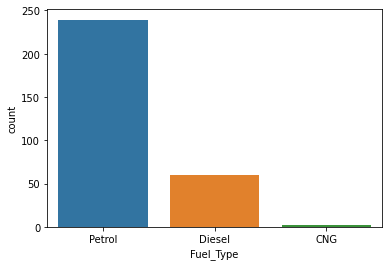

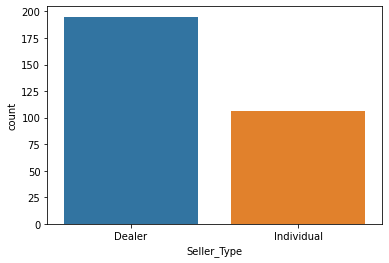

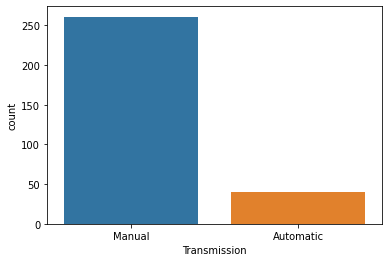

In [26]:
#Visualize categorical features
import seaborn as sns
for i in range(len(categorical_features)):
    plt.figure(i)
    sns.countplot(x=categorical_features[i], data=df)
    plt.show()

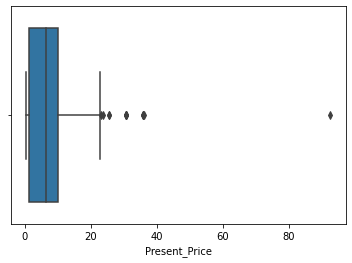

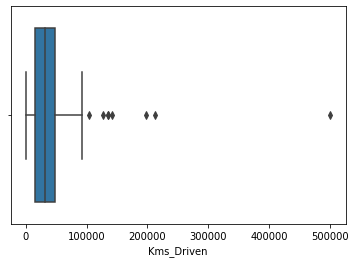

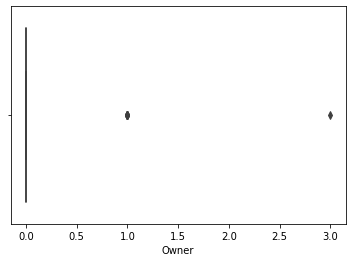

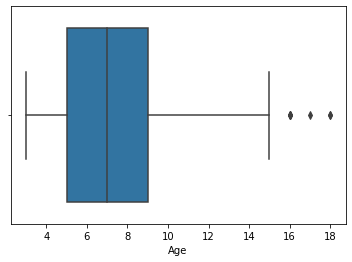

In [27]:
#Visualize numerical features
i=0
for i in range(len(numerical_features)):
    plt.figure(i)
    sns.boxplot(x=numerical_features[i], data=df)
    plt.show()

In [28]:
#get the dummy variables based on categorcial features
df = pd.get_dummies(data = df,drop_first=True)
df.head()

,Present_Price,Kms_Driven,Owner,Selling_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,3.35,7,0,1,0,1
1,9.54,43000,0,4.75,8,1,0,0,1
2,9.85,6900,0,7.25,4,0,1,0,1
3,4.15,5200,0,2.85,10,0,1,0,1
4,6.87,42450,0,4.60,7,1,0,0,1


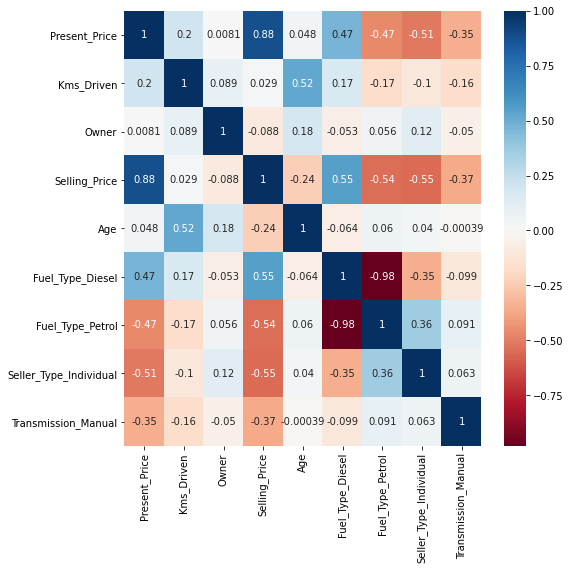

In [29]:
#Correlations matrix
fig = plt.figure(figsize=[8,8])
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [30]:
# Separating the target variable from its features
y = df[[output]]
X = df.drop(output,axis=1)

In [31]:
#scaling data
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
max_abs_scaler = MaxAbsScaler()
X_scaled=min_max_scaler.fit_transform(X) 
y_scaled=min_max_scaler.fit_transform(y)

In [32]:
#split the data into train and test. Test data=1/5(total data)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=1/5,random_state=27, shuffle=True)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240, 1)
y test:  (61, 1)


In [33]:
#Define the general ML class for regression that contains different algorithms
class ML_regressors():
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def LinearRegression(self):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    #Training
    model.fit(self.X_train,self.y_train)
    #train set
    y_pred_train = model.predict(self.X_train)
    R2_train_model = r2_score(self.y_train,y_pred_train)
    RMSE_train_model = np.sqrt(mean_squared_error(self.y_train, y_pred_train, squared=True))
    #test set
    y_pred_test = model.predict(self.X_test)
    R2_test_model = r2_score(self.y_test,y_pred_test)
    RMSE_test_model = np.sqrt(mean_squared_error(self.y_test, y_pred_test, squared=True))
    #cross validation
    cross_val = cross_val_score(model ,self.X_train ,self.y_train, scoring = 'r2',cv=5)
    cv_mean = cross_val.mean()
    cross_rmse = cross_val_score(model ,X_train ,y_train, scoring = 'neg_root_mean_squared_error' ,cv=5)
    cv_rmse_mean = -cross_rmse.mean()
    return R2_train_model, RMSE_train_model, R2_test_model, RMSE_test_model, cv_mean, cv_rmse_mean

  def LassoRegression(self):
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import RandomizedSearchCV
    ls = Lasso()
    alpha = np.logspace(-3,3,num=14) # range for alpha
    model = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha), random_state = 27)
    #Training
    model.fit(self.X_train,self.y_train)
    #train set
    y_pred_train = model.predict(self.X_train)
    R2_train_model = r2_score(self.y_train,y_pred_train)
    RMSE_train_model = np.sqrt(mean_squared_error(self.y_train, y_pred_train, squared=True))
    #test set
    y_pred_test = model.predict(self.X_test)
    R2_test_model = r2_score(self.y_test,y_pred_test)
    RMSE_test_model = np.sqrt(mean_squared_error(self.y_test, y_pred_test, squared=True))
    #cross validation
    cross_val = cross_val_score(model ,self.X_train ,self.y_train, scoring = 'r2',cv=5)
    cv_mean = cross_val.mean()
    cross_rmse = cross_val_score(model ,X_train ,y_train, scoring = 'neg_root_mean_squared_error' ,cv=5)
    cv_rmse_mean = -cross_rmse.mean()
    return R2_train_model, RMSE_train_model, R2_test_model, RMSE_test_model, cv_mean, cv_rmse_mean

  def RidgeRegression(self):
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import RandomizedSearchCV
    # Creating Ridge model object
    rg = Ridge()
    # range of alpha 
    alpha = np.logspace(-3,3,num=14)
    # Creating RandomizedSearchCV to find the best estimator of hyperparameter
    model = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha), random_state = 27)
    #Training
    model.fit(self.X_train,self.y_train)
    #train set
    y_pred_train = model.predict(self.X_train)
    R2_train_model = r2_score(self.y_train,y_pred_train)
    RMSE_train_model = np.sqrt(mean_squared_error(self.y_train, y_pred_train, squared=True))
    #test set
    y_pred_test = model.predict(self.X_test)
    R2_test_model = r2_score(self.y_test,y_pred_test)
    RMSE_test_model = np.sqrt(mean_squared_error(self.y_test, y_pred_test, squared=True))
    #cross validation
    cross_val = cross_val_score(model ,self.X_train ,self.y_train, scoring = 'r2',cv=5)
    cv_mean = cross_val.mean()
    cross_rmse = cross_val_score(model ,X_train ,y_train, scoring = 'neg_root_mean_squared_error' ,cv=5)
    cv_rmse_mean = -cross_rmse.mean()
    return R2_train_model, RMSE_train_model, R2_test_model, RMSE_test_model, cv_mean, cv_rmse_mean

  def RandomForest(self):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import RandomizedSearchCV
    rf = RandomForestRegressor()

    # Number of trees in Random forest
    n_estimators=list(range(500,1000,100))
    # Maximum number of levels in a tree
    max_depth=list(range(4,9,4))
    # Minimum number of samples required to split an internal node
    min_samples_split=list(range(4,9,2))
    # Minimum number of samples required to be at a leaf node.
    min_samples_leaf=[1,2,5,7]
    # Number of fearures to be considered at each split
    max_features=['auto','sqrt']

    # Hyperparameters dict
    param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

    model = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, verbose = 0, random_state = 27)
    #Training
    model.fit(self.X_train,self.y_train)
    #train set
    y_pred_train = model.predict(self.X_train)
    R2_train_model = r2_score(self.y_train,y_pred_train)
    RMSE_train_model = np.sqrt(mean_squared_error(self.y_train, y_pred_train, squared=True))
    #test set
    y_pred_test = model.predict(self.X_test)
    R2_test_model = r2_score(self.y_test,y_pred_test)
    RMSE_test_model = np.sqrt(mean_squared_error(self.y_test, y_pred_test, squared=True))
    #cross validation
    cross_val = cross_val_score(model ,self.X_train ,self.y_train, scoring = 'r2',cv=5)
    cv_mean = cross_val.mean()
    cross_rmse = cross_val_score(model ,X_train ,y_train, scoring = 'neg_root_mean_squared_error' ,cv=5)
    cv_rmse_mean = -cross_rmse.mean()
    return R2_train_model, RMSE_train_model, R2_test_model, RMSE_test_model, cv_mean, cv_rmse_mean

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import RandomizedSearchCV

    gb = GradientBoostingRegressor()

    # Rate at which correcting is being made
    learning_rate = [0.001, 0.01, 0.1, 0.2]
    # Number of trees in Gradient boosting
    n_estimators=list(range(500,1000,100))
    # Maximum number of levels in a tree
    max_depth=list(range(4,9,4))
    # Minimum number of samples required to split an internal node
    min_samples_split=list(range(4,9,2))
    # Minimum number of samples required to be at a leaf node.
    min_samples_leaf=[1,2,5,7]
    # Number of fearures to be considered at each split
    max_features=['auto','sqrt']

    # Hyperparameters dict
    param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

    model = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, verbose = 0, random_state = 27)
    #Training
    model.fit(self.X_train,self.y_train)
    #train set
    y_pred_train = model.predict(self.X_train)
    R2_train_model = r2_score(self.y_train,y_pred_train)
    RMSE_train_model = np.sqrt(mean_squared_error(self.y_train, y_pred_train, squared=True))
    #test set
    y_pred_test = model.predict(self.X_test)
    R2_test_model = r2_score(self.y_test,y_pred_test)
    RMSE_test_model = np.sqrt(mean_squared_error(self.y_test, y_pred_test, squared=True))
    #cross validation
    cross_val = cross_val_score(model ,self.X_train ,self.y_train, scoring = 'r2',cv=5)
    cv_mean = cross_val.mean()
    cross_rmse = cross_val_score(model ,X_train ,y_train, scoring = 'neg_root_mean_squared_error' ,cv=5)
    cv_rmse_mean = -cross_rmse.mean()
    return R2_train_model, RMSE_train_model, R2_test_model, RMSE_test_model, cv_mean, cv_rmse_mean

  def __call__(self):
    return 

In [34]:
#Run and train the algorithms
import warnings
warnings.filterwarnings('ignore')
models = ['LinearRegression' , 'RidgeRegression' , 'LassoRegression', 'RandomForest', 'GradientBoosting']
regressors = ML_regressors(X_train, y_train, X_test, y_test)
CV = {}
R2_train = {}
R2_test = {}
RMSE_train = {}
RMSE_test = {}
CV_RMSE = {}
for i in range(len(models)):
  result = getattr(regressors, models[i])()
  R2_train[models[i]] = round(result[0] , 2)
  RMSE_train[models[i]] = round(result[1] , 2)
  R2_test[models[i]] = round(result[2] , 2)
  RMSE_test[models[i]] = round(result[3] , 2)
  CV[models[i]] = round(result[4] , 2)
  CV_RMSE[models[i]] = round(result[5] , 2)

print ('R2 Train:', R2_train)
print ('R2 Test:', R2_test)
print ('R2 CV:', CV)
print ('RMSE Train:', RMSE_train)
print ('RMSE Test:', RMSE_test)
print ('RMSE CV:', CV_RMSE)

R2 Train: {'LinearRegression': 0.87, 'RidgeRegression': 0.87, 'LassoRegression': 0.87, 'RandomForest': 0.99, 'GradientBoosting': 1.0}
R2 Test: {'LinearRegression': 0.88, 'RidgeRegression': 0.91, 'LassoRegression': 0.9, 'RandomForest': 0.88, 'GradientBoosting': 0.84}
R2 CV: {'LinearRegression': 0.79, 'RidgeRegression': 0.79, 'LassoRegression': 0.8, 'RandomForest': 0.92, 'GradientBoosting': 0.94}
RMSE Train: {'LinearRegression': 1.7, 'RidgeRegression': 1.72, 'LassoRegression': 1.71, 'RandomForest': 0.56, 'GradientBoosting': 0.0}
RMSE Test: {'LinearRegression': 2.14, 'RidgeRegression': 1.85, 'LassoRegression': 1.94, 'RandomForest': 2.14, 'GradientBoosting': 2.48}
RMSE CV: {'LinearRegression': 2.13, 'RidgeRegression': 2.11, 'LassoRegression': 2.06, 'RandomForest': 1.27, 'GradientBoosting': 1.16}


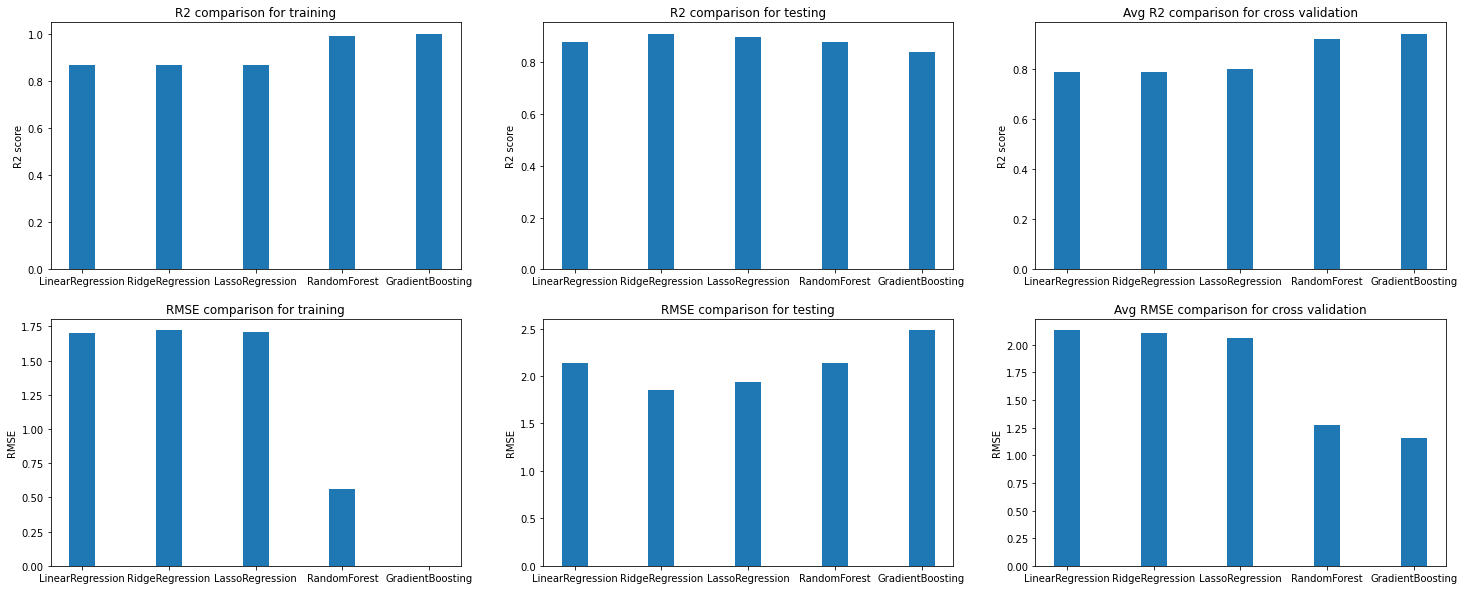

In [35]:
#Visualize the performances metrics
fig = plt.figure(figsize=[25,10])

plt.subplot(2,3,1)
plt.bar(range(len(R2_train)), list(R2_train.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(R2_train)), list(R2_train.keys()))
plt.ylabel('R2 score')
plt.title('R2 comparison for training')

plt.subplot(2,3,2)
plt.bar(range(len(R2_test)), list(R2_test.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(R2_test)), list(R2_test.keys()))
plt.ylabel('R2 score')
plt.title('R2 comparison for testing')

plt.subplot(2,3,3)
plt.bar(range(len(CV)), list(CV.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(CV)), list(CV.keys()))
plt.ylabel('R2 score')
plt.title('Avg R2 comparison for cross validation')

plt.subplot(2,3,4)
plt.bar(range(len(RMSE_train)), list(RMSE_train.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(RMSE_train)), list(RMSE_train.keys()))
plt.ylabel('RMSE')
plt.title('RMSE comparison for training')

plt.subplot(2,3,5)
plt.bar(range(len(RMSE_test)), list(RMSE_test.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(RMSE_test)), list(RMSE_test.keys()))
plt.ylabel('RMSE')
plt.title('RMSE comparison for testing')

plt.subplot(2,3,6)
plt.bar(range(len(CV_RMSE)), list(CV_RMSE.values()), align='center',  width=(range(len(R2_test))[1]-range(len(R2_test))[0])*0.3)
plt.xticks(range(len(CV_RMSE)), list(CV_RMSE.keys()))
plt.ylabel('RMSE')
plt.title('Avg RMSE comparison for cross validation')

plt.show()